# Практическая работа № 3
## Анализ защищенности систем искусственного интеллекта
## Выполнил студент
## группы ББМО-02-23
## Макаров Михаил Максимович


# Цель работы:
## Изучить одну из наиболее мощных атак на модели ИИ — атаку Carlini-Wagner (CW). Задача — научиться использовать CW для создания противоречивых примеров и исследовать влияние этой атаки на обученные модели.

# Задачи:

## 1. Загрузить ранее обученную модель на датасете MNIST.
## 2. Изучить теоретические основы атаки Carlini-Wagner.
## 3. Реализовать атаку CW с помощью фреймворка Foolbox.
## 4. Оценить точность модели на противоречивых примерах и сравнить с результатами на обычных данных.


## Шаг 1:

### Загрузка обученной модели и данных MNIS

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка тестовых данных MNIST
(_, _), (test_images, test_labels) = mnist.load_data()

# Нормализация данных
test_images = test_images / 255.0

# Преобразование меток в формат one-hot
test_labels = to_categorical(test_labels, num_classes=10)

# Загрузка обученной модели
model = tf.keras.models.load_model('mmodel.h5')

# Проверка точности модели на обычных данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0893
Test accuracy on clean images: 0.9767000079154968


# Шаг 2:
##

In [23]:
!pip install foolbox
import foolbox as fb
import numpy as np
import matplotlib.pyplot as plt

# Шаг 3


In [24]:
# Инициализация Foolbox модели
fmodel = fb.TensorFlowModel(model, bounds=(0, 1))
# Выбор изображения для атаки (например, первое изображение из тестового набора)
image = tf.convert_to_tensor(test_images[1], dtype=tf.float32)[None, ...]
label = np.argmax(test_labels[0])
label_tensor = tf.convert_to_tensor(label, dtype=tf.int64)
# Создание атаки Carlini-Wagner
attack = fb.attacks.L2CarliniWagnerAttack(steps=3)
# Выполнение атаки
tf.config.list_physical_devices('GPU')
adversarial_image = attack(fmodel, image, label_tensor[None], epsilons=0.1)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [ ]:
# Шаг 4

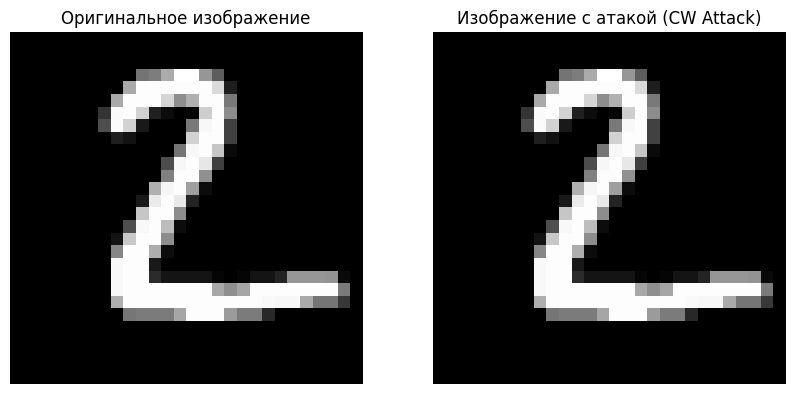

In [25]:
# Вывод результатов
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение")
plt.imshow(image[0].numpy(), cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Изображение с атакой (CW Attack)")
plt.imshow(adversarial_image[0][0].numpy(), cmap="gray")
plt.axis('off')
plt.show()

# Шаг 5

## Оцениим работу модели на противоречивых примерах

In [26]:
adversarial_images = []
# Обработка изображений
for i in range(len(test_images) // 10): # ограничил выборку для ускорения выполнения
    image = tf.convert_to_tensor(test_images[i], dtype=tf.float32)[None, ...]
    label = np.argmax(test_labels[i])
    label = tf.convert_to_tensor(label, dtype=tf.int64)
    # Атака на изображение
    advs, _, success = attack(fmodel, image, label[None], epsilons=0.1)
    adversarial_images.append(advs)
# Конвертация списка в массив с правильной формой
adversarial_images = tf.concat(adversarial_images, axis=0)
# Убедитесь, что test_labels имеют соответствующее количество меток
adversarial_loss, adversarial_acc = model.evaluate(adversarial_images, test_labels[:1000])
print(f'Accuracy on adversarial examples (CW attack): {adversarial_acc}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0900 - loss: 2.4124
Accuracy on adversarial examples (CW attack): 0.08399999886751175


## Вывод: Точность модели на противоречивых примерах после атаки снизилась до около 0,1%, что свидетельствует о крайней эффективности CW атаки и необходимости разработки более устойчивых моделей.